### Question 2:

Given the following 3D input data.\
1 1 9\
2 4 6\
3 7 4\
4 11 4\
5 9 2
1. Plot the  3D data points.
2. Compute the sample covariance matrix.
$$\dfrac{(x-\mu)^{T}(x-\mu)}{n-1}$$\
3. Compute the eigen vectors and eigen values of the sample covariance matrix.
4. Project the data points  along the 2 major Eigen vectors (i.e Eigen vectors corresponding to 2 dominant Eigen values) and plot the 2D projected data points.
For this you can multiply the 5x3 data matrix with the 3x2 matrix containing dominant eigen values



In [1]:
import numpy as np
import mpl_toolkits.mplot3d 
from matplotlib import pyplot as plt

In [2]:
#0 input data
X = np.array([[1, 1, 9],[2, 4, 6],[3, 7, 4],[4, 11, 4],[5, 9, 2]])
print(X.shape,"\n", X)

(5, 3) 
 [[ 1  1  9]
 [ 2  4  6]
 [ 3  7  4]
 [ 4 11  4]
 [ 5  9  2]]


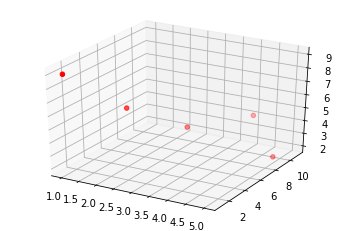

In [3]:
#1 plotting the 3D data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:,0]
y = X[:,1]
z = X[:,2]
ax.scatter(x,y,z, color='red')
plt.show()

In [4]:
#2 Computing the sample covariance matrix
mean_x = np.mean(X,axis=0)
X_Cov = np.matmul(np.transpose(X-mean_x),(X-mean_x))/(X.shape[0]-1)
X_Cov

array([[ 2.5 ,  5.75, -4.  ],
       [ 5.75, 15.8 , -9.25],
       [-4.  , -9.25,  7.  ]])

In [5]:
#3 Computing the eigen values and eigen vectors
[e_val,e_vec] = np.linalg.eig(X_Cov)
print(e_val,"\n",e_vec)

[23.92868148  0.12980618  1.24151234] 
 [[ 0.31047214  0.91384283 -0.26172187]
 [ 0.80139329 -0.10354986  0.58910629]
 [-0.5112493   0.39264324  0.76449686]]


In [6]:
#4 Projection onto principle components
P_comp1 = e_vec[:,0]
P_comp2 = e_vec[:,2]
P = np.vstack((P_comp1,P_comp2))
Proj_data = np.matmul(X,P.T)
Proj_data

array([[-3.48937824,  7.20785614],
       [ 0.75902166,  6.41996257],
       [ 4.49617227,  6.39656586],
       [ 8.01221757,  8.49126915],
       [ 7.74240173,  5.522341  ]])

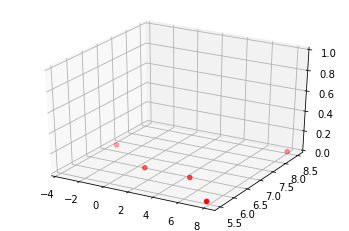

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = Proj_data[:,0]
y = Proj_data[:,1]
z = np.zeros((len(y)))
ax.set_zlim(0,1)
ax.scatter(x,y,z, color='red')
plt.show()

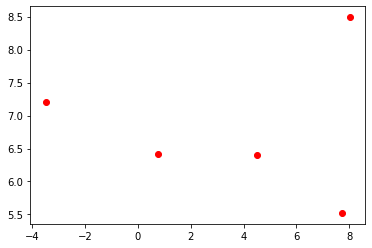

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = Proj_data[:,0]
y = Proj_data[:,1]
ax.scatter(x,y, color='red')
plt.show()

### Question 3:
1. Using the Iris flower dataset , plot the histogram for each feature(any three) for any one of the species of your choice.
2. Assuming a 1D Gaussian distribution plot the distributions for each species using any one feature.(use the same feature for all 3 species)
3. Assuming a 2D Gaussian, select any 2 features and plot the distribution for each species.


### Steps
#### 1. Load the iris data file and read it 
#### 2. Plot the histogram for each feature of a selected species
#### 3. Plot the 1D gaussian distribution using the mean and variance of one feature for all the three species
#### 4. Plot the 2D gaussian distribution using  the 2D mean vector and Covariance matrix by considering any 2 features for all the species

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# Loading and reading the iris data file
data = pd.read_csv("../PRML TA/iris.csv")
iris=np.array(data)

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.0, 1.59, 2.18, 2.7700000000000005, 3.3600000000000003, 3.95,
        4.540000000000001, 5.130000000000001, 5.720000000000001,
        6.3100000000000005, 6.9], dtype=object),
 <a list of 10 Patch objects>)

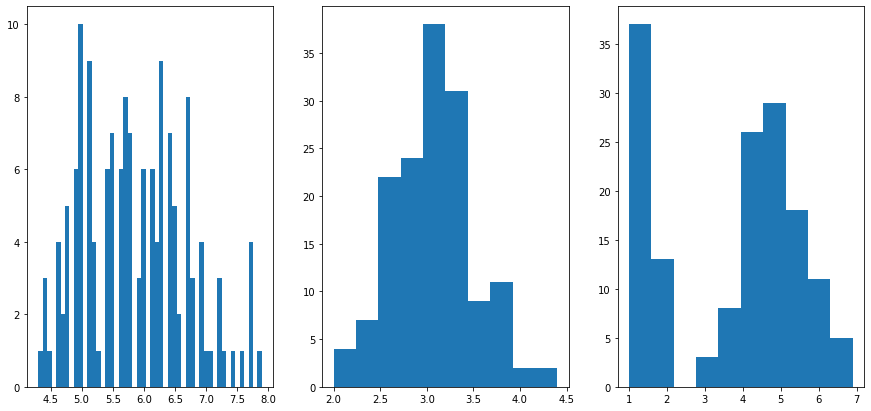

In [6]:
# Plot the feature histogram of a species
# Sepal width, sepal length and petal length histogram of setosa
sepal_length_setosa = iris[:,1]
sepal_width_setosa = iris[:,2]
petal_length_setosa = iris[:,3]
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.hist(sepal_length_setosa,50)
plt.subplot(132)
plt.hist(sepal_width_setosa)
plt.subplot(133)
plt.hist(petal_length_setosa)

In [8]:
# 1D gaussian parameters of all the 3 species based on one single feature(petal length)
setosa_1d_mean = np.mean(iris[0:50,3])
setosa_1d_variance = np.dot((iris[0:50,3]-setosa_1d_mean),(iris[0:50,3]-setosa_1d_mean)) / 49
versicolor_1d_mean = np.mean(iris[50:100,3])
versicolor_1d_variance = np.dot((iris[50:100,3]-versicolor_1d_mean),(iris[50:100,3]-versicolor_1d_mean)) / 49
verginica_1d_mean = np.mean(iris[100:150,3])
verginica_1d_variance = np.dot((iris[100:150,3]-verginica_1d_mean),(iris[100:150,3]-verginica_1d_mean)) / 49
print(setosa_1d_mean, versicolor_1d_mean, verginica_1d_mean,"\n" )
print(setosa_1d_variance, versicolor_1d_variance, verginica_1d_variance)

1.464 4.26 5.552 

0.030106122448979603 0.22081632653061237 0.304587755102041


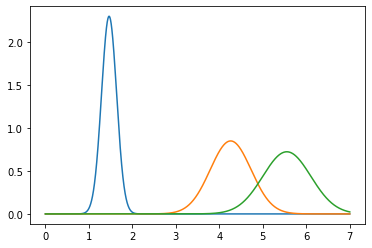

In [9]:
# plot the 1D gaussian 
X=np.linspace(0,7,10000)
y_1 = (1/np.sqrt(2*np.pi*setosa_1d_variance))*(np.exp(-((X-setosa_1d_mean)**2)/(2*setosa_1d_variance)))
y_2 = (1/np.sqrt(2*np.pi*versicolor_1d_variance))*(np.exp(-((X-versicolor_1d_mean)**2)/(2*versicolor_1d_variance)))
y_3 = (1/np.sqrt(2*np.pi*verginica_1d_variance))*(np.exp(-((X-verginica_1d_mean)**2)/(2*verginica_1d_variance)))
plt.figure
plt.plot(X,y_1)
plt.plot(X,y_2)
plt.plot(X,y_3)


In [10]:
# 2D gaussian parameters of all the 3 species based on two features
setosa_2d_mean = np.mean(iris[0:50,1:3],axis=0,dtype='float')
setosa_2d_variance = np.array(np.dot((iris[0:50,1:3]-setosa_2d_mean).T,(iris[0:50,1:3]-setosa_2d_mean)) / 49,dtype='float')
versicolor_2d_mean = np.mean(iris[50:100,1:3],axis=0,dtype='float')
versicolor_2d_variance = np.array(np.dot((iris[50:100,1:3]-versicolor_2d_mean).T,(iris[50:100,1:3]-versicolor_2d_mean)) / 49,dtype='float')
verginica_2d_mean = np.mean(iris[100:150,1:3],axis=0,dtype='float')
verginica_2d_variance = np.array(np.dot((iris[100:150,1:3]-verginica_2d_mean).T,(iris[100:150,1:3]-verginica_2d_mean)) / 49,dtype='float')
print(setosa_2d_mean, versicolor_2d_mean, verginica_2d_mean,"\n" )
print(setosa_2d_variance,"\t", versicolor_2d_variance,"\t", verginica_2d_variance)

[5.006 3.418] [5.936 2.77 ] [6.588 2.974] 

[[0.12424898 0.10029796]
 [0.10029796 0.14517959]] 	 [[0.26643265 0.08518367]
 [0.08518367 0.09846939]] 	 [[0.40434286 0.09376327]
 [0.09376327 0.10400408]]


In [11]:
# plot the 2D gaussian
X = np.linspace(1,8,1000)
Y = np.linspace (1,5,1000)
X, Y = np.meshgrid(X,Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
def pdf_gauss_2d(pos, mu, sigma):
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    fac = np.einsum('...k,kl,...l->...', pos-mu,inv_sigma, pos-mu)
    z = (1/2*np.pi*det_sigma)*(np.exp(-fac/2))
    return z
z_1 = pdf_gauss_2d(pos,setosa_2d_mean,setosa_2d_variance)
z_2 = pdf_gauss_2d(pos,versicolor_2d_mean,versicolor_2d_variance)
z_3 = pdf_gauss_2d(pos,verginica_2d_mean,verginica_2d_variance)

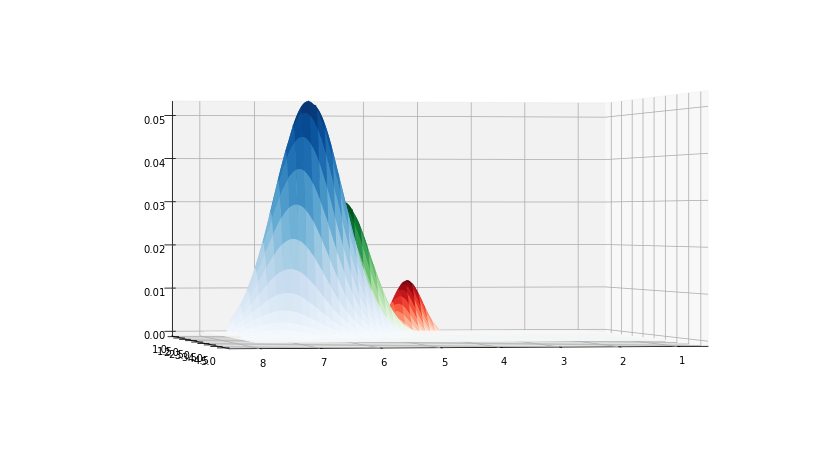

In [60]:
fig = plt.figure(figsize=(50,8))
ax1 = fig.add_subplot(1,3,1,projection='3d')
ax1.view_init(0,80)
ax1.plot_surface(X, Y, z_1,cmap='Reds')
ax1.plot_surface(X, Y, z_2,cmap='Greens')
ax1.plot_surface(X, Y, z_3,cmap='Blues')
# ax2 = fig.add_subplot(1,3,2,projection='3d')
# ax2.view_init(55,-70)
# ax2.plot_surface(X, Y, z_2)
# ax3 = fig.add_subplot(1,3,3,projection='3d')
# ax3.view_init(55,-70)
# ax3.plot_surface(X, Y, z_3)
plt.show()


### Question 4:
Generate random numbers in a range, with mean and variance of your choice from:
1. Gaussian distribution 
2. Binomial distribution
3. Poisson distribution
4. Uniform distribution\
of sizes 50, 500 and 5000 data points, and plot the histograms point samples.


In [24]:
gauss_samples = np.random.normal(1,25,5000)

In [25]:
binomial_samples = np.random.binomial(10,0.5,5000)

In [26]:
Poission_samples = np.random.poisson(5,5000)

In [27]:
uniform_samples = np.random.uniform(-60,60,5000)

(array([101., 102., 124.,  95., 101., 100., 102., 107.,  85.,  88., 106.,
         93.,  80.,  87., 125.,  91., 108.,  94., 108.,  88.,  87.,  96.,
        120.,  94., 109.,  94., 108.,  90., 111.,  93.,  96., 110.,  84.,
        113.,  96.,  95.,  89.,  89., 106.,  94., 100., 105., 107.,  85.,
        116., 108., 137.,  97.,  98.,  88.]),
 array([-5.99941745e+01, -5.75943477e+01, -5.51945209e+01, -5.27946941e+01,
        -5.03948673e+01, -4.79950405e+01, -4.55952137e+01, -4.31953869e+01,
        -4.07955601e+01, -3.83957333e+01, -3.59959065e+01, -3.35960797e+01,
        -3.11962529e+01, -2.87964261e+01, -2.63965993e+01, -2.39967725e+01,
        -2.15969457e+01, -1.91971189e+01, -1.67972921e+01, -1.43974653e+01,
        -1.19976385e+01, -9.59781170e+00, -7.19798490e+00, -4.79815809e+00,
        -2.39833129e+00,  1.49550808e-03,  2.40132231e+00,  4.80114911e+00,
         7.20097591e+00,  9.60080271e+00,  1.20006295e+01,  1.44004563e+01,
         1.68002831e+01,  1.92001099e+01,  2.15999

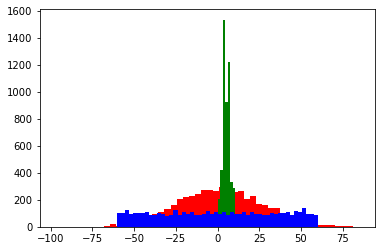

In [28]:
# Plot the histograms for all the above sample points
plt.figure()
plt.hist(gauss_samples,50,color='r')
#plt.hist(binomial_samples,50,color='b')
plt.hist(Poission_samples,10,color='g')
plt.hist(uniform_samples,50,color='b')

### Question 5:
Using the data provided , the best straight line fitting the data points is to be evaluated. i.e find the coefficients b0, b1 of the line y = b0+b1x .
1. Read the following Sweden auto insurance data set, split it into training and testing sets.
2. Using the training set Compute the mean and variance of each variable (i.e. x and y)
3. Compute the covariance between the two variables (i.e Cov(x,y)).
4. Find the coefficients of the best fitting straight line.The coefficients are given by following formulae
            b1 = Cov(x,y) / var(x)
            b0 = mean(y) - b1 mean(x)
5. And plot the straight line along  with all the data points.
6. Perform the prediction on test data set using the regression solution and compute the root mean squared error between original data values and predicted values. 



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../PRML TA/insurance.csv")
sweden_insurance = np.array(data,dtype='float')
sweden_train = sweden_insurance[0:48,:]
sweden_test = sweden_insurance[48:63,:]

In [142]:
data_mean = np.mean(sweden_train,axis=0)
data_cov_matrix = (np.dot((sweden_train-data_mean).T,((sweden_train-data_mean))))/(sweden_train.shape[0]-1)
data_cov_matrix 

array([[ 665.53014184, 2253.76507092],
       [2253.76507092, 8523.17742908]])

In [143]:
b_1 = data_cov_matrix[0,1]/data_cov_matrix[0,0]
b_0 = data_mean[1]-b_1*data_mean[0]
print(b_0,b_1)

11.046169933317174 3.386420733218066


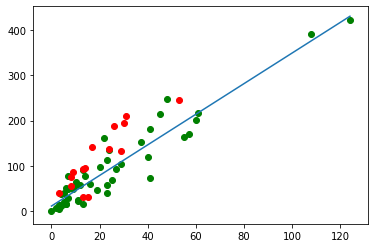

In [144]:
x = np.linspace(np.min(sweden_insurance[:,0]),np.max(sweden_insurance[:,0]),100)
y = b_0 + b_1*x
plt.figure()
plt.plot(x,y)
plt.scatter(sweden_train[:,0],sweden_train[:,1],c='green')
plt.scatter(sweden_test[:,0],sweden_test[:,1],c='red')
plt.show()

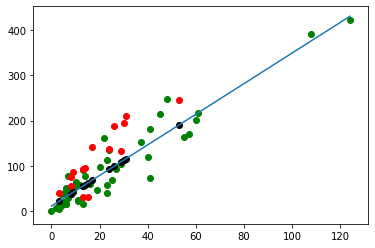

In [145]:
# for prediction
X_test = np.vstack((np.ones(sweden_test.shape[0]),sweden_test[:,0])).T
y_hat = np.dot(X_test,[[b_0],[b_1]])
x = np.linspace(np.min(sweden_insurance[:,0]),np.max(sweden_insurance[:,0]),100)
y = b_0 + b_1*x
plt.figure()
plt.plot(x,y)
plt.scatter(sweden_train[:,0],sweden_train[:,1],c='green')
plt.scatter(sweden_test[:,0],sweden_test[:,1],c='red')
plt.scatter(sweden_test[:,0],y_hat,c='black')
plt.show()

In [149]:
# root mean squared error
y_true = np.array(sweden_test[:,1])
rms_error = np.sqrt(np.sum(np.square(y_true-y_hat.T))/(sweden_test.shape[0]-1))
rms_error

55.24173451646633

### Question 6:
Repeat the problem 5 using linear algebra least squares solution.
$$ X\, b = y$$\
$$b = (X^{T}X)^{-1}X^{T}y$$

In [3]:
X = np.vstack((np.ones(sweden_train.shape[0]),sweden_train[:,0])).T
y = np.array(sweden_train[:,1])
y = np.reshape(y,(X.shape[0],1))
pinv = np.matmul(np.linalg.inv(np.dot(X.T,X)),X.T)
b = np.dot(pinv,y)
b


array([[11.04616993],
       [ 3.38642073]])

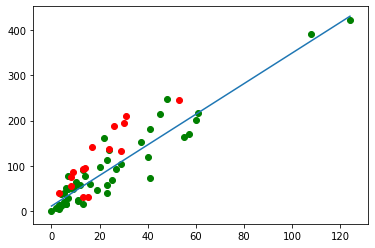

In [4]:
x = np.linspace(np.min(sweden_insurance[:,0]),np.max(sweden_insurance[:,0]),100)
y = b[0] + b[1]*x
plt.figure()
plt.plot(x,y)
plt.scatter(sweden_train[:,0],sweden_train[:,1],c='green')
plt.scatter(sweden_test[:,0],sweden_test[:,1],c='red')
plt.show()

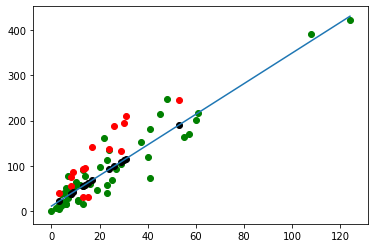

In [5]:
# for prediction
X_test = np.vstack((np.ones(sweden_test.shape[0]),sweden_test[:,0])).T
y_hat = np.dot(X_test,b)
x = np.linspace(np.min(sweden_insurance[:,0]),np.max(sweden_insurance[:,0]),100)
y = b[0] + b[1]*x
plt.figure()
plt.plot(x,y)
plt.scatter(sweden_train[:,0],sweden_train[:,1],c='green')
plt.scatter(sweden_test[:,0],sweden_test[:,1],c='red')
plt.scatter(sweden_test[:,0],y_hat,c='black')
plt.show()

In [6]:
y_true = np.array(sweden_test[:,1])
rms_error = np.sqrt(np.sum(np.square(y_true-y_hat.T))/(sweden_test.shape[0]-1))
rms_error

55.24173451646632